In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
path_to_train='Train/'
path_to_test='Test/'

In [3]:
X_train=np.load(path_to_train+"X_train.npy")
y_train=np.load(path_to_train+"y_train.npy")
X_test=np.load(path_to_test+"X_test.npy")
y_test=np.load(path_to_test+"y_test.npy")

Необходимо бороться с несбалансированностью классов. Так же этот метод понизит размерность данных, что приведёт к более быстрой работе программы.

In [4]:
from imblearn.under_sampling import NearMiss

In [5]:
nm=NearMiss()
X_train_miss, y_train_miss=nm.fit_resample(X_train, y_train)

In [6]:
print(X_train_miss.shape, y_train_miss.shape)

(7405, 12000) (7405,)


## Метод k ближайших соседей

In [7]:
from sklearn.neighbors import KNeighborsClassifier

Посмотрим, как результат зависит от количества соседей. Выберем число соседей от 1 до 10.

In [8]:
neighbour_arr=[]
for i in range (1,11):
    neighbour_arr.append(i)

In [13]:
%%time
train_err=[]
test_err=[]
for neighbour in neighbour_arr:
    model = KNeighborsClassifier(n_neighbors=neighbour)
    model.fit(X_train_miss, y_train_miss)

    y_train_pred = model.predict(X_train_miss)
    y_test_pred = model.predict(X_test)
    
    train_err.append(np.mean(y_train_miss != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))

Wall time: 20min 46s


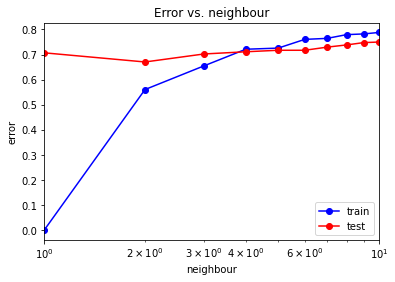

In [14]:
plt.semilogx(neighbour_arr, train_err, 'b-o', label = 'train')
plt.semilogx(neighbour_arr, test_err, 'r-o', label = 'test')
plt.xlim([np.min(neighbour_arr), np.max(neighbour_arr)])
plt.title('Error vs. neighbour')
plt.xlabel('neighbour')
plt.ylabel('error')
plt.legend()

Данный метод не показал хороших результатов. Мы столкнулись с недообучением. Ошибка на обучающей выборке очень большая. Она растёт с количеством соседей.

Посмотрим, какой будет результат, если возьмём p=1 (Манхеттеновское расстояние). 

In [16]:
model = KNeighborsClassifier(n_neighbors=2, p=1)
model.fit(X_train_miss, y_train_miss)

KNeighborsClassifier(n_neighbors=2, p=1)

In [17]:
%%time
y_train_pred = model.predict(X_train_miss)
y_test_pred = model.predict(X_test)
np.mean(y_train_miss != y_train_pred), np.mean(y_test != y_test_pred)

Wall time: 47min 31s


(0.5769074949358541, 0.5686546463245492)

In [ ]:
%%time
train_err=[]
test_err=[]
for neighbour in neighbour_arr:
    model = KNeighborsClassifier(n_neighbors=neighbour, p=1)
    model.fit(X_train_miss, y_train_miss)

    y_train_pred = model.predict(X_train_miss)
    y_test_pred = model.predict(X_test)
    
    train_err.append(np.mean(y_train_miss != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))

In [ ]:
plt.semilogx(neighbour_arr, train_err, 'b-o', label = 'train')
plt.semilogx(neighbour_arr, test_err, 'r-o', label = 'test')
plt.xlim([np.min(neighbour_arr), np.max(neighbour_arr)])
plt.title('Error vs. neighbour')
plt.xlabel('neighbour')
plt.ylabel('error')
plt.legend()

Ошибка на обучающей выборке осталась такой же, а на тестовой уменьшилась на 20%. Получили, что на обучающей выборке ошибка больше, чем на тестовой.

Метод снова не показал хороших результатов. 

Также при выборе манхеттеновского расстояния обнаружен ещё один минус - программа работала очень долго.

## Выводы

1. Метод k ближайших соседей показал себя плохо на этом наборе данных.
2. От большого набора данных при борьбе с несбалансированностью классов мы пришли к меньшему в несколько раз набору данных. Это могло сыграть роль в недообучении. 
3. При применении другого метода при борьбе с несбалансированностью классов (который увеличивает число данных) могли возникнуть вычислительные трудности - время работы программы могло увеличиться в несколько раз.
4. Данный метод плохо работает на задачах больших размерностей. Возникают трудности при подсчёте расстояний.